In [51]:
import numpy as np    #ALL OF THESE ARE PACKAGES IN PYTHON HAVING VARIOUS FEATURES
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
hdis_df = pd.read_csv("framingham.csv") #reading the data from the file

In [52]:
hdis_df.drop(['education'],axis=1,inplace=True) #to exclude the person's educational background cuz education has no effect on diseas


In [53]:
hdis_df.head() #To give sample data as output to check if we've read the data or not.


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [54]:
hdis_df.rename(columns={'male':'Sex_male'},inplace=True)
hdis_df.isnull().sum() #to sum up the values 


Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [55]:
hdis_df.dropna(axis=0,inplace=True)

In [56]:
count=0
for i in hdis_df.isnull().sum(axis=1):
    if (i>0):
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(hdis_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


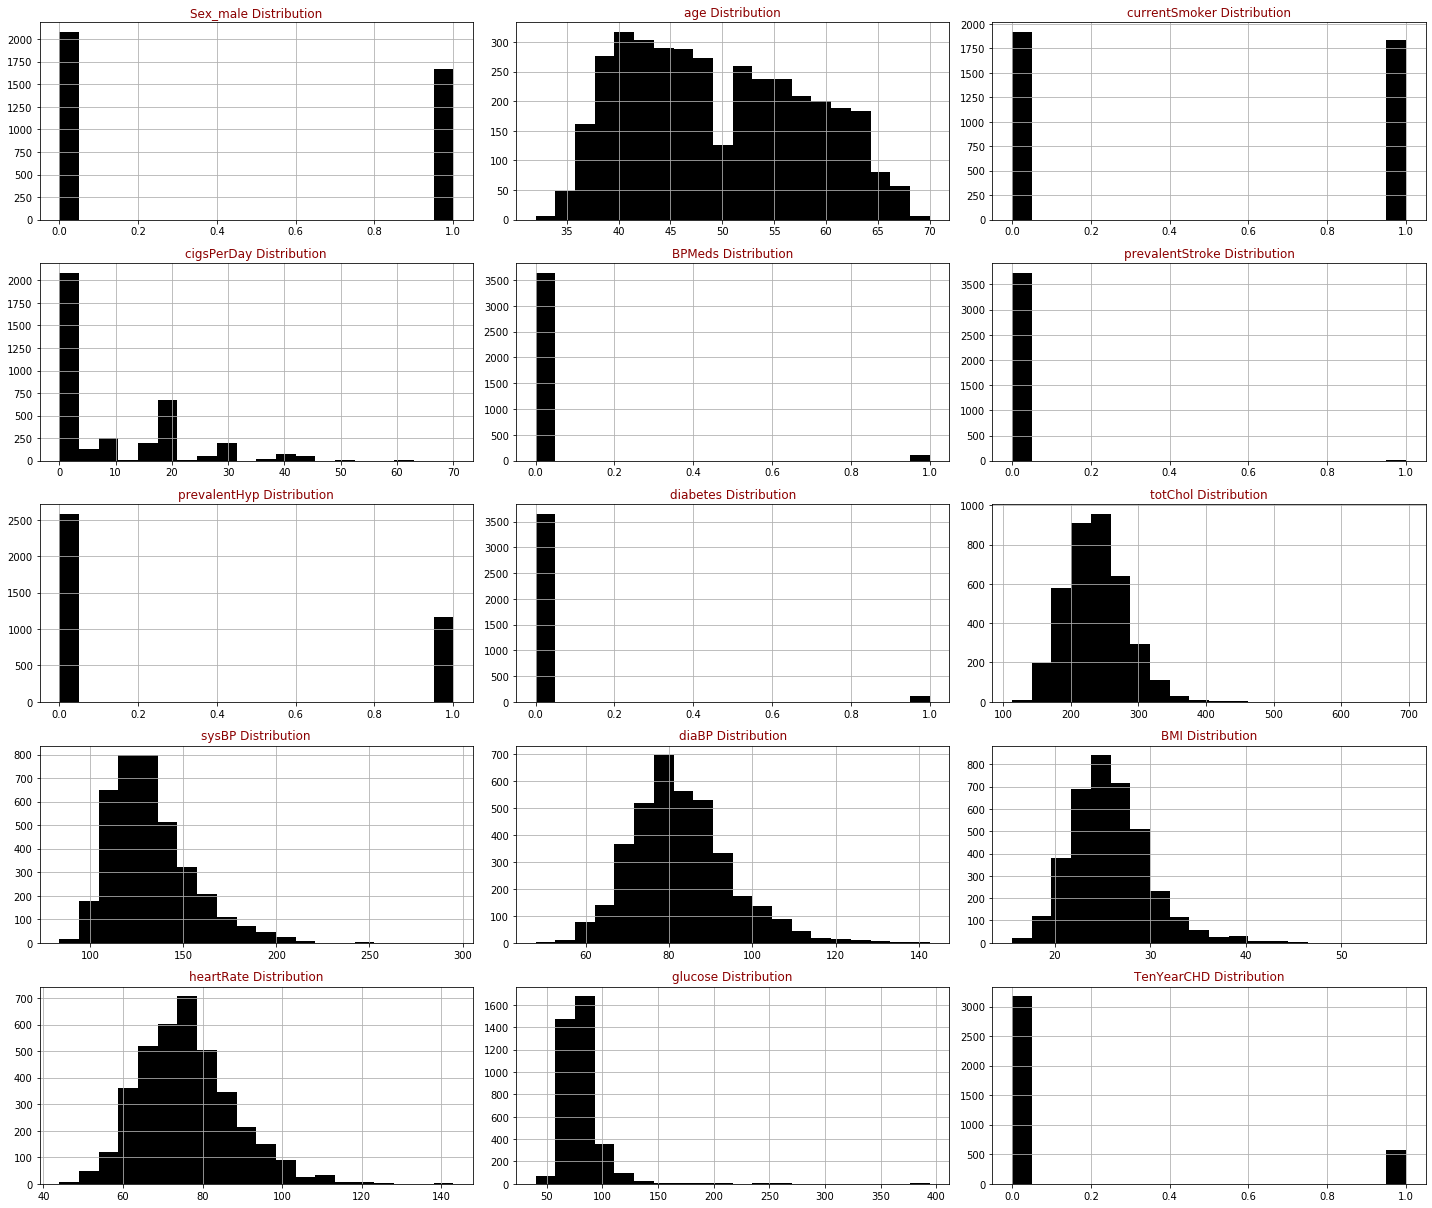

In [57]:
def Graph(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='black')
        ax.set_title(feature+" Distribution",color='darkred')
        
    fig.tight_layout()  
    plt.show()
Graph(hdis_df,hdis_df.columns,6,3)

In [58]:
hdis_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

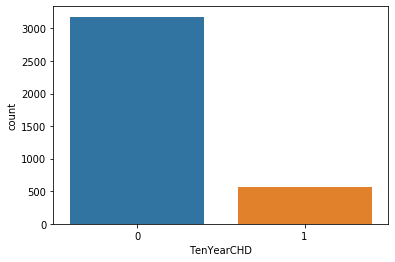

In [59]:
sn.countplot(x='TenYearCHD',data=hdis_df)  #plots graph those likely to have CHD based on Gender

In [60]:
hdis_df.describe() #calculates a summary of statistics related to the DataFrame columns

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
sn.pairplot(data=hdis_df) #pairplot is just scatter plot graph

In [ ]:
from statsmodels.tools import add_constant as add_constant #adds a column of ones to an array
hdis_df_constant = add_constant(hdis_df)
hdis_df_constant.head()

In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)#lambda is a small anonymous function which can have only one expresion
cols=hdis_df_constant.columns[:-1]
model=sm.Logit(hdis_df.TenYearCHD,hdis_df_constant[cols])
result=model.fit()
result.summary()

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
   #takes data frame, independent var and column names
   #keeps repeating algorithm to eliminate features with P value more than alpha one at a time
    #p value testing is a method of hypothesis testing to find likely or unlikely.
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(hdis_df_constant,hdis_df.TenYearCHD,cols)

In [ ]:
result.summary() #creates a summary table

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int()) #exp is exponential
conf['OR'] = params
pvalue=round(result.pvalues,3) #rounds off the given number and returns naerest floating point value
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

In [ ]:
import sklearn
new_features=hdis_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1] #iloc returns a panda series
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred) #testing accuracy of prediction

In [ ]:
from sklearn.metrics import confusion_matrix#table that's usedd to describe the performance of a classification model
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('The acuuracy of the model= ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = ',TN/float(TN+FP),'\n',

'Positive Predictive value = ',TP/float(TP+FP),'\n',

'Negative predictive Value = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = ',(1-sensitivity)/specificity)


In [ ]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

In [ ]:
from sklearn.preprocessing import binarize #discretization of continuous feature values.
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

In [ ]:
from sklearn.metrics import roc_curve #receiver operating curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])